In [3]:
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm

In [13]:
def Calculate_Function(x):
    x1, x2 = x
    f = 0.8
    return np.cos(x1*f) * (25-x1**2) - np.cos(x2*f) * (25-x2**2)

In [12]:
def Calculate_Gradient(x):
    x1, x2 = x
    h = 0.01
    h1 = np.array([h, 0.0])
    h2 = np.array([0.0, h])
    z = Calculate_Function(x)
    dx = (Calculate_Function(x + h1) - z)/h
    dy = (Calculate_Function(x+h2 )- z) / h
    return np.array([dx, dy])


In [14]:
def Calculate_Descent_Gradient(x, step=.005):
    x = x - step * Calculate_Gradient(x)
    return x

In [15]:
x = np.array(\
    [np.outer(np.linspace(-5.0,5.0,100), np.ones(100)), \
    np.outer(np.ones(100), np.linspace(-3.0,7.0,100))],
        )

z = Calculate_Function(x)

[ 3.27073239 -0.005     ]


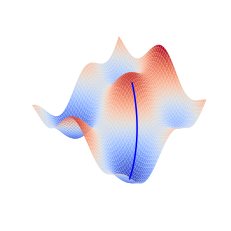

In [26]:
xi = np.array([0.5, 3])
xs = []
zs = []

for i in range(100):
    zi = Calculate_Function(xi)
    xs.append(xi)
    zs.append(zi)
    xi = Calculate_Descent_Gradient(xi)

xs = np.array(xs)
zs = np.array(zs)
 
axes = plt.axes(projection='3d')
axes.view_init(50, -45)
axes.plot_surface(x[0,:], x[1,:], z, cmap=cm.coolwarm)
axes.plot(xs[:, 0], xs[:, 1], zs, '-',c='b', zorder=100)
plt.axis('off')

print(xi)